# Soft Computing

## Cvičení 10 - Shlukování

### Demonstrace

#### 10.1 K-means from scratch

**Metrics for distance between samples**

In [ ]:
def squared_euclidean_distance(x1: list[float], x2: list[float]) -> float:
    '''
    Calculates squared Euclidean distance between two samples in N dimensional space

    Parameters:
        x1 (float): N dimensional vector that represents sample
        x2 (float): second sample to calculate distance to from x1

    Returns:
        float: distance between input samples x1 and x2 
    '''
    return sum([(x1j-x2j)**2 for x1j,x2j in zip(x1, x2)])

In [ ]:
import unittest

class TestEuclideanDistance(unittest.TestCase):
    
    def test_euclidean_distance_3D(self):
        x1 = [1, 2, 3]
        x2 = [2, 2, 5]
        ed2 = squared_euclidean_distance(x1, x2)
        self.assertEqual(ed2, 5)
        
print(squared_euclidean_distance.__doc__)
unittest.main(argv=[''], verbosity=2, exit=False)

**Cost function to optimize**

In [19]:
def cluster_inertia(X: list[list[float]], mu: list[list[float]], w: list[int]) -> float:
    '''
    Calculates sum of squared within-cluster errors (distances of samples from centroid)

    Parameters:
        X  (list[list[float]]): matrix of sample features, rows are samples, cols are features
        mu (list[list[float]]): matrix of centroid features, rows are centroids, cols are features
        w  (list[int]):         list of sample membership indeces to centroids

    Returns:
        float: sum of squared errors of distances between samples in cluster and cluster centroid
    '''
    sum_squared_errors = 0
    for k, mu_k in enumerate(mu):
        x_k = [x for i, x in enumerate(X) if w[i] == k]
        print(x_k, mu_k)
        sum_squared_errors += sum([squared_euclidean_distance(x_ki, mu_k) for x_ki in x_k])
    return sum_squared_errors

In [ ]:
import unittest

class TestClusterIntertia(unittest.TestCase):
    
    def test_squared_error_two_samples_two_clusters(self):
        X =  [[1, 2, 3], [2, 2, 5]]
        mu = [[0, 1, 1], [2, 2, 2]]
        w = [0, 1]
        sse = cluster_inertia(X, mu, w)
        self.assertEqual(sse, 15)

    def test_squared_error_two_samples_one_cluster(self):
        X =  [[1, 2, 3], [2, 2, 5]]
        mu = [[0, 1, 1]]
        w = [0, 0]
        sse = cluster_inertia(X, mu, w)
        self.assertEqual(sse, 27)
        
print(cluster_inertia.__doc__)
unittest.main(argv=[''], verbosity=2, exit=False)

#### 10.2 K-means via sklearn

In [ ]:
!python3 -m pip install scikit-learn

**Create artificial dataset**

In [93]:
from sklearn.datasets import make_blobs

X, y = make_blobs(      # creates artificial data as a blobs of points
    n_samples=150,      # how many points should be created
    n_features=2,       # how many samples should blob points have (1D, 2D, ...)
    centers=3,          # how many blobs should be created
    cluster_std=1.5,    # standard deviation of points from blobs
    shuffle=True,       # shuffle the samples
    random_state=9      # for deterministic generating
)

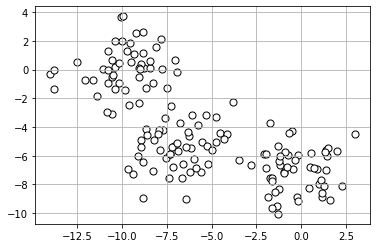

In [94]:
import matplotlib.pyplot as plt

plt.scatter(            # creates scatter plot (x vs y features)
    x=X[:,0],           # vector of x features
    y=X[:,1],           # vector of y features
    c='white',          # color of point on xi, yi intersection
    marker='o',         # how should marker for point look like
    edgecolors='black', # edge color of marker
    s=50                # marker size
)

plt.grid()              # creates grid on scatter plot
plt.show()              # display plot on screen

**model instantization**

In [95]:
from sklearn.cluster import KMeans

km = KMeans(        # initialize KMeans model instance
    n_clusters=3,   # number of centroids to use
    init='random',  # choose init centroids positions randomly (or k-means++)
    n_init=10,      # run kmeans algorithm n_init times independently and choose best model
    max_iter=300,   # max iterations in one kmeans run
    tol=1e-04,      # convergence criterium if not reached max iterations
    random_state=1  # for deterministic clusterization
)

**dataset fitting**

In [96]:
y = km.fit_predict(X)

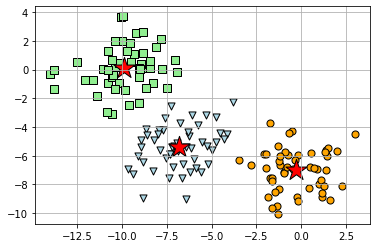

In [97]:
import matplotlib.pyplot as plt

n_clusters = 3
colors = ['lightgreen', 'orange', 'lightblue']
markers = ['s', 'o', 'v']

for k in range(n_clusters): #places all samples on scatterplot with respective category colors
    plt.scatter(            
        x=X[y==k, 0],           
        y=X[y==k, 1],           
        c=colors[k],          
        marker=markers[k],         
        edgecolors='black', 
        s=50                
    )

plt.scatter( #place centroids on scatterplot          
    x=km.cluster_centers_[:, 0],           
    y=km.cluster_centers_[:, 1],
    c='red',          
    marker='*',         
    edgecolors='black', 
    s=500                
)

plt.grid()
plt.show()

#### 10.3 Optimal number of clusters

**Elbow method**

In [111]:
min_clusters = 2
max_clusters = 10
distortions = []
for n_clusters in range(min_clusters, max_clusters+1):
    km = KMeans(        
        n_clusters=n_clusters,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=1
    )
    km.fit_predict(X)
    distortions.append(km.inertia_)

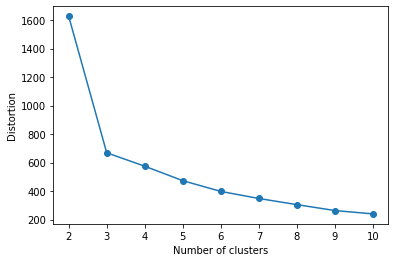

In [112]:
plt.plot(range(min_clusters, max_clusters+1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**Fuzzy Partition Coefficient**

In [ ]:
!python3 -m pip install scikit-fuzzy

In [ ]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

In [ ]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")